<a href="https://www.kaggle.com/code/maxmuller00/wine-sentiment-analysis?scriptVersionId=157596800" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot');

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_csv('/kaggle/input/wine-reviews/winemag-data-130k-v2.csv')
df = df.head(5000)

In [3]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
print(df.shape)

(5000, 14)


## Quick EDA

<Axes: title={'center': 'Review Counts by Points'}, xlabel='points'>

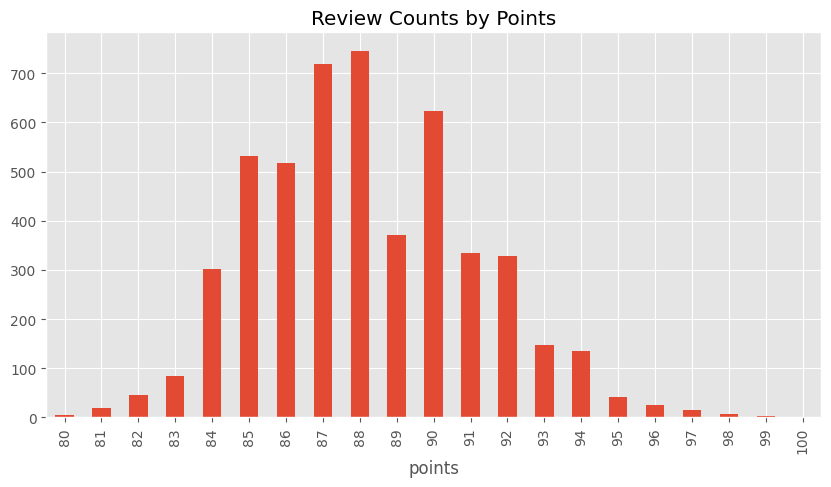

In [5]:
df['points'].value_counts().sort_index().plot(kind="bar", title="Review Counts by Points",
                                             figsize=(10, 5))

## NLTK

In [6]:
example = df['description'][100]
print(example)

Fresh apple, lemon and pear flavors are accented by a hint of smoked nuts in this bold, full-bodied Pinot Gris. Rich and a bit creamy in mouthfeel yet balanced briskly, it's a satisfying white with wide pairing appeal. Drink now through 2019.


In [7]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Fresh',
 'apple',
 ',',
 'lemon',
 'and',
 'pear',
 'flavors',
 'are',
 'accented',
 'by']

In [8]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Fresh', 'NNP'),
 ('apple', 'NN'),
 (',', ','),
 ('lemon', 'NN'),
 ('and', 'CC'),
 ('pear', 'JJ'),
 ('flavors', 'NNS'),
 ('are', 'VBP'),
 ('accented', 'VBN'),
 ('by', 'IN')]

In [9]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Fresh/NNP)
  apple/NN
  ,/,
  lemon/NN
  and/CC
  pear/JJ
  flavors/NNS
  are/VBP
  accented/VBN
  by/IN
  a/DT
  hint/NN
  of/IN
  smoked/JJ
  nuts/NNS
  in/IN
  this/DT
  bold/JJ
  ,/,
  full-bodied/JJ
  (PERSON Pinot/NNP Gris/NNP)
  ./.
  (PERSON Rich/NNP)
  and/CC
  a/DT
  bit/NN
  creamy/JJ
  in/IN
  mouthfeel/NN
  yet/RB
  balanced/VBN
  briskly/NN
  ,/,
  it/PRP
  's/VBZ
  a/DT
  satisfying/JJ
  white/JJ
  with/IN
  wide/JJ
  pairing/VBG
  appeal/NN
  ./.
  (PERSON Drink/NN)
  now/RB
  through/IN
  2019/CD
  ./.)


## VADER Sentiment Scoring

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [11]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [12]:
sia.polarity_scores('I am sad.')

{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

In [13]:
sia.polarity_scores(example)

{'neg': 0.048, 'neu': 0.711, 'pos': 0.241, 'compound': 0.8481}

In [14]:
#iterate polarity over entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    descript = row['description']
    name = row['title']
    res[name] = sia.polarity_scores(descript)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [15]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'title'})
vaders = vaders.merge(df, how="right")

In [16]:
vaders.head()

,title,neg,neu,pos,compound,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery
0,Nicosia 2013 Vulkà Bianco (Etna),0.000,0.935,0.065,0.1531,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,White Blend,Nicosia
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),0.000,0.868,0.132,0.6486,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Portuguese Red,Quinta dos Avidagos
2,Rainstorm 2013 Pinot Gris (Willamette Valley),0.053,0.947,0.000,-0.1280,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Gris,Rainstorm
3,St. Julian 2013 Reserve Late Harvest Riesling ...,0.000,0.926,0.074,0.3400,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,Riesling,St. Julian
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,0.000,0.805,0.195,0.8176,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Noir,Sweet Cheeks


## Plot VADER results

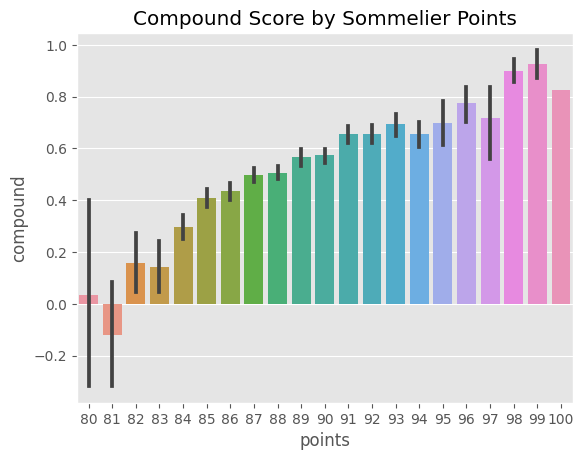

In [17]:
ax = sns.barplot(data=vaders, x='points', y='compound')
ax.set_title('Compound Score by Sommelier Points')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

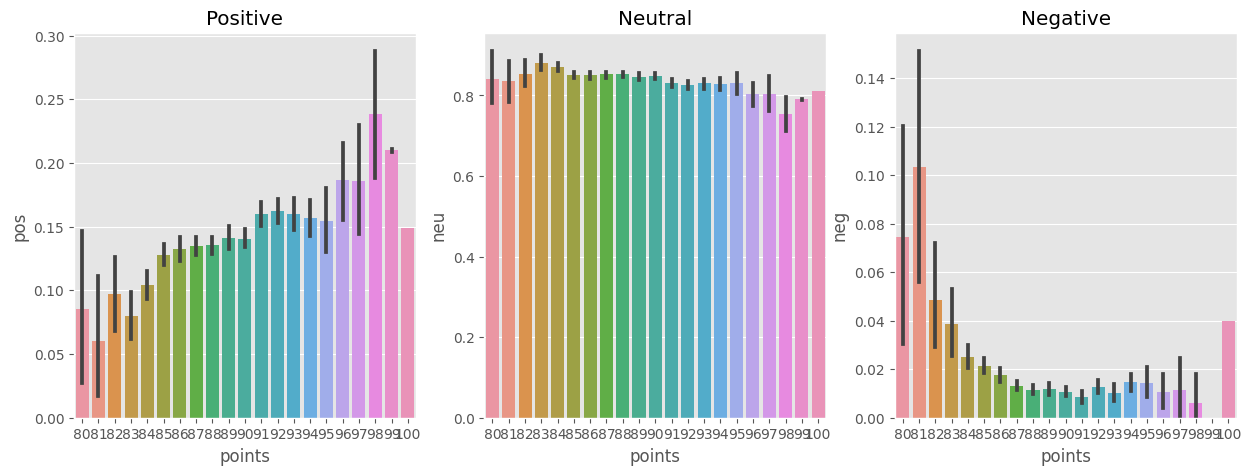

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=vaders, x='points', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='points', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='points', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show

## RoBERTa pre-trained model

In [19]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [20]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [21]:
#Vader scores
print(example)
sia.polarity_scores(example)

Fresh apple, lemon and pear flavors are accented by a hint of smoked nuts in this bold, full-bodied Pinot Gris. Rich and a bit creamy in mouthfeel yet balanced briskly, it's a satisfying white with wide pairing appeal. Drink now through 2019.


{'neg': 0.048, 'neu': 0.711, 'pos': 0.241, 'compound': 0.8481}

In [22]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2],
}
print(scores_dict)

{'roberta_neg': 0.0011527444, 'roberta_neu': 0.06066974, 'roberta_pos': 0.93817747}


In [23]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2],
    }
    return scores_dict

In [24]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    descript = row['description']
    name = row['title']
    vader_result = sia.polarity_scores(descript)
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
    roberta_result = polarity_scores_roberta(descript)
    both = {**vader_result, **roberta_result}
    res[name] = both

  0%|          | 0/5000 [00:00<?, ?it/s]

In [25]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'title'})
results_df = results_df.merge(df, how='right')
results_df.head()

,title,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Unnamed: 0,country,...,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery
0,Nicosia 2013 Vulkà Bianco (Etna),0.000,0.935,0.065,0.1531,0.089829,0.733946,0.176225,0,Italy,...,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,White Blend,Nicosia
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),0.000,0.868,0.132,0.6486,0.003927,0.053314,0.942759,1,Portugal,...,Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Portuguese Red,Quinta dos Avidagos
2,Rainstorm 2013 Pinot Gris (Willamette Valley),0.053,0.947,0.000,-0.1280,0.008010,0.606127,0.385862,2,US,...,NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Gris,Rainstorm
3,St. Julian 2013 Reserve Late Harvest Riesling ...,0.000,0.926,0.074,0.3400,0.002878,0.196365,0.800758,3,US,...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,Riesling,St. Julian
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,0.000,0.805,0.195,0.8176,0.019464,0.258500,0.722036,4,US,...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Noir,Sweet Cheeks


<function matplotlib.pyplot.show(close=None, block=None)>

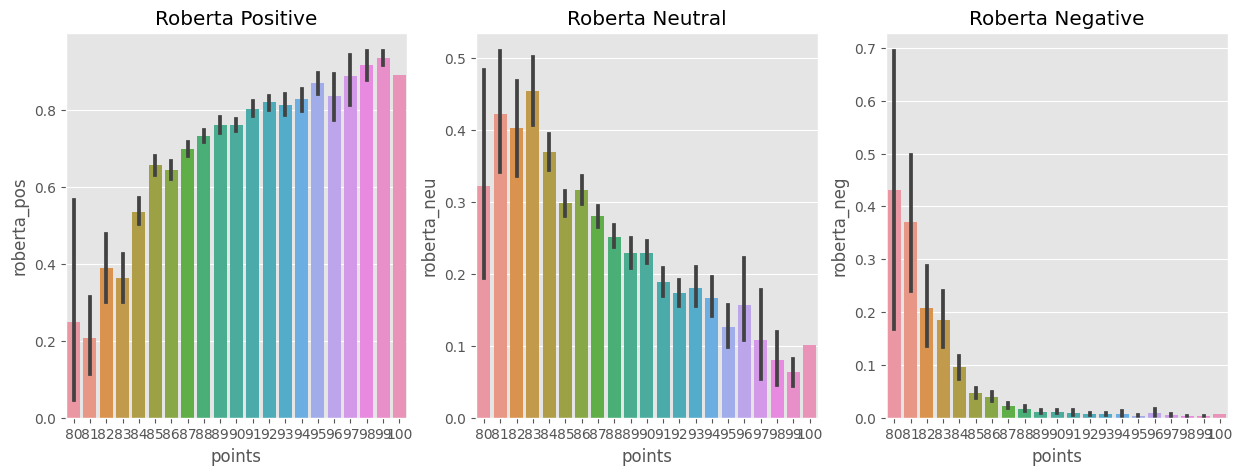

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=results_df, x='points', y='roberta_pos', ax=axs[0])
sns.barplot(data=results_df, x='points', y='roberta_neu', ax=axs[1])
sns.barplot(data=results_df, x='points', y='roberta_neg', ax=axs[2])
axs[0].set_title('Roberta Positive')
axs[1].set_title('Roberta Neutral')
axs[2].set_title('Roberta Negative')
plt.show

## Combine and Compare VADER and RoBERTa models

In [27]:
results_df.columns

Index(['title', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'Unnamed: 0', 'country', 'description', 'designation',
       'points', 'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'variety', 'winery'],
      dtype='object')

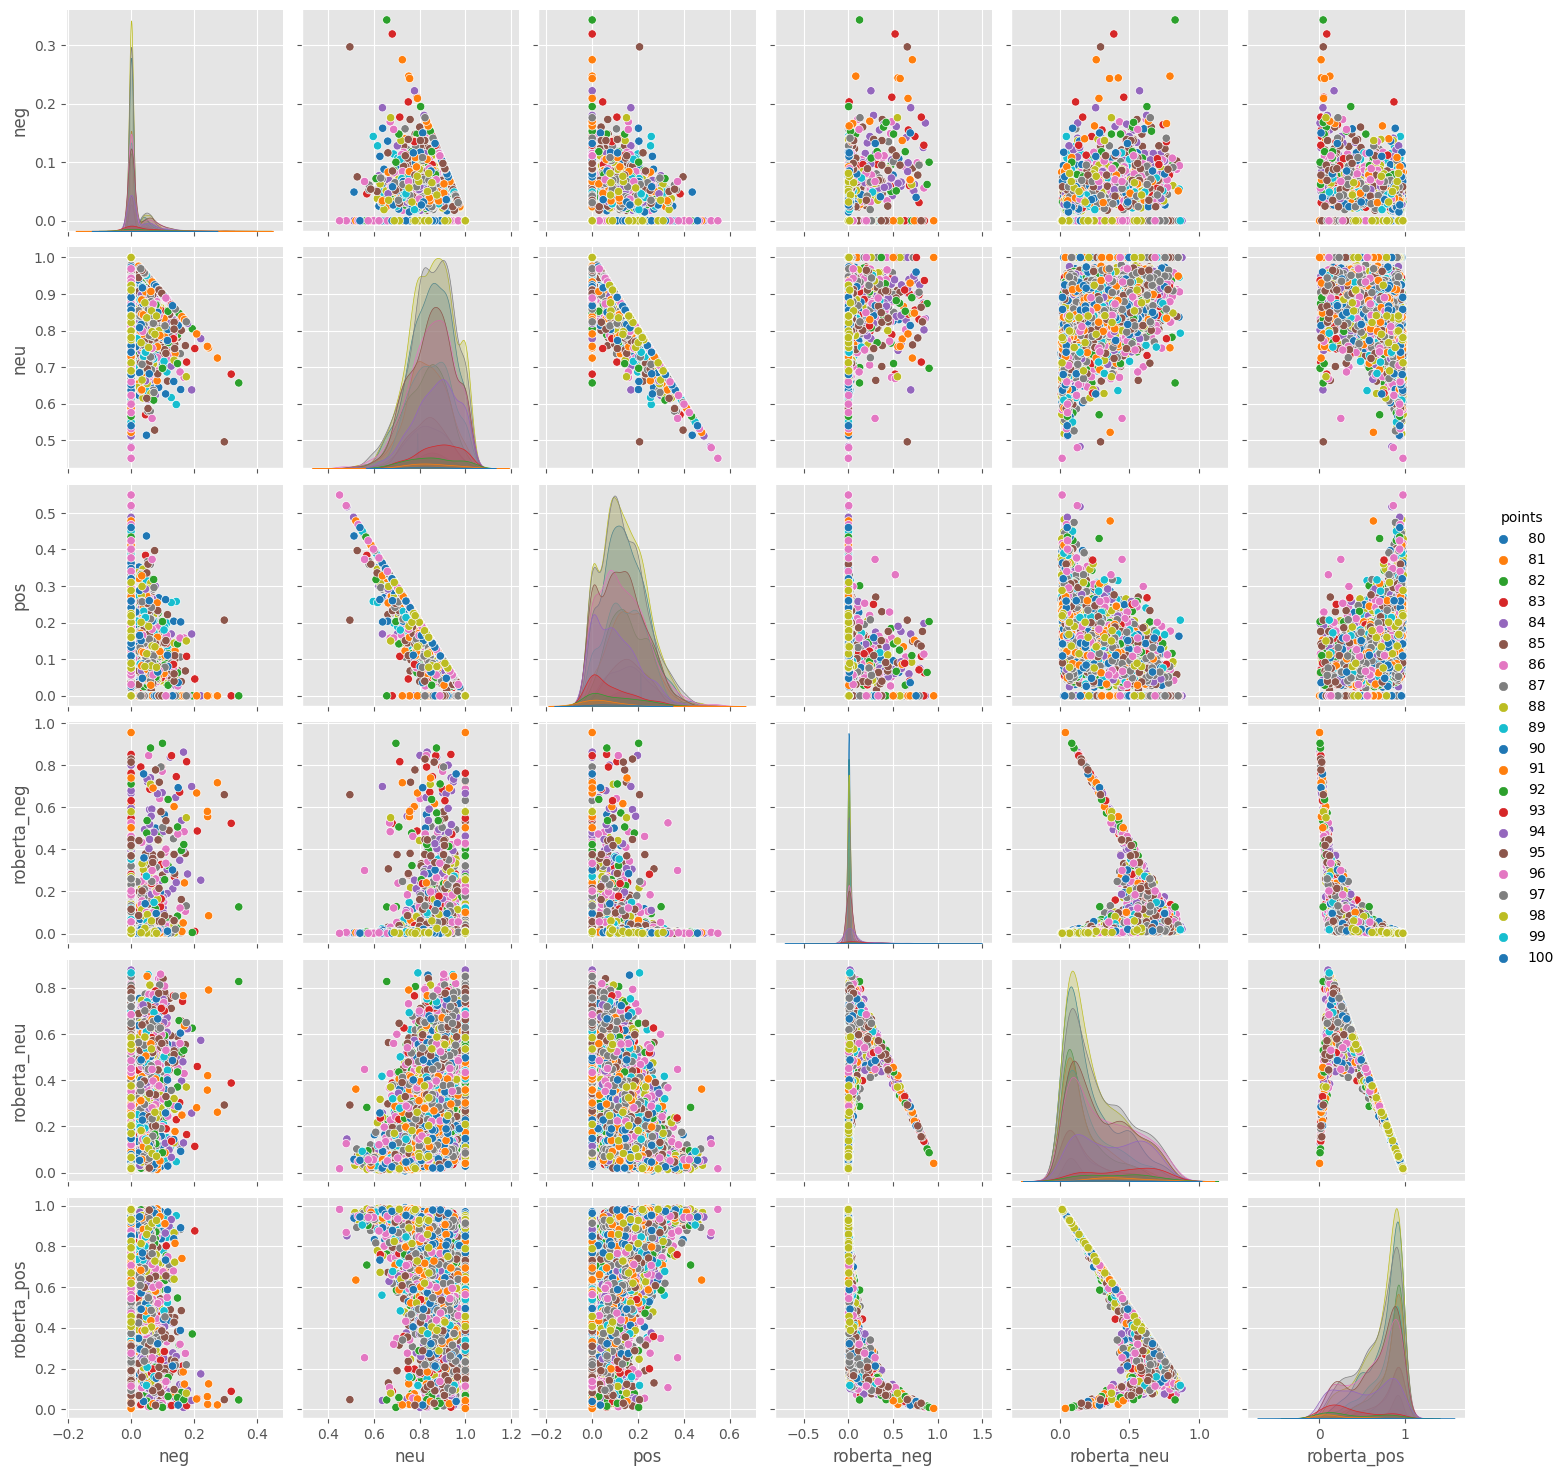

In [28]:
sns.pairplot(data=results_df, 
             vars=[ 'neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu',
       'roberta_pos'],
            hue='points',
            palette='tab10')
plt.show()

## Review Examples

In [29]:
#Low Score but high positivity
results_df.query('points <= 84').sort_values('roberta_pos', ascending=False)['description'].values[0]

"This rustic Cabernet has pretty good varietal flavors of blackberries and dried currants, enhanced with an oaky sweetness. It's full bodied and tannic, and fine for drinking now."

In [30]:
#High Score with high negativity
results_df.query('points >= 97').sort_values('roberta_neg', ascending=False)['description'].values[0]

"RunRig is always complex, and the 2012 doesn't disappoint in that regard, mixing bacony-meaty notes with hints of black olives and ripe plums. The tannins are supremely supple, but the acids are crisp, resulting in a long, mouthwatering finish. Drink now–2030."

## Linear Regression VADER vs RoBERTa

In [31]:
#VADER linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = results_df[['neg', 'neu', 'pos']]
y = results_df['points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 8.12764530005766
R-squared: 0.02432788766680516


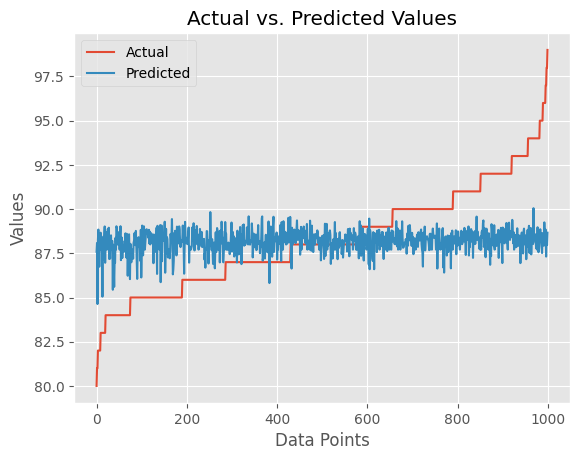

In [32]:
# Sort the actual and predicted values based on the predictor values or indices
sorted_indices = np.argsort(y_test)  # Sorting indices based on y_test values
y_test_sorted = y_test.iloc[sorted_indices]  # Sorting y_test
y_pred_sorted = y_pred[sorted_indices]  # Sorting y_pred in the same order

# Plotting the actual and predicted values as two lines
plt.plot(range(len(y_test)), y_test_sorted, label='Actual')
plt.plot(range(len(y_test)), y_pred_sorted, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

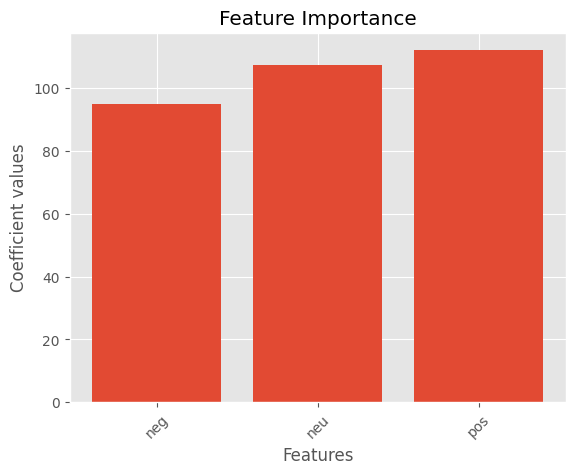

In [33]:
coef = model.coef_  # Assuming 'model' is your trained Linear Regression model
feature_names = ['neg', 'neu', 'pos']  # Replace with your actual feature names
plt.bar(feature_names, coef)
plt.xlabel('Features')
plt.ylabel('Coefficient values')
plt.title('Feature Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [34]:
#Roberta Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = results_df[['roberta_neg', 'roberta_neu', 'roberta_pos']]
y = results_df['points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 7.683300123949181
R-squared: 0.0776686992516501


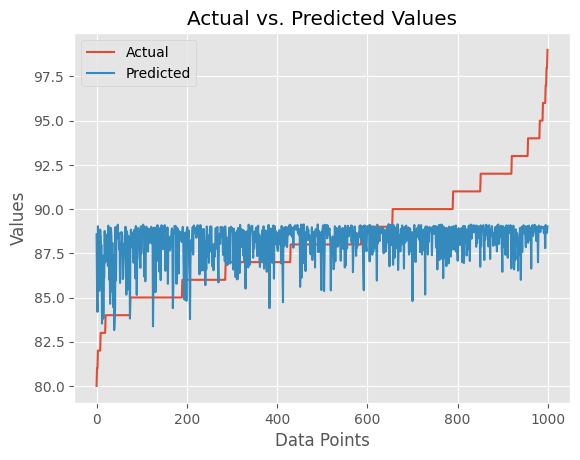

In [35]:
# Sort the actual and predicted values based on the predictor values or indices
sorted_indices = np.argsort(y_test)  # Sorting indices based on y_test values
y_test_sorted = y_test.iloc[sorted_indices]  # Sorting y_test
y_pred_sorted = y_pred[sorted_indices]  # Sorting y_pred in the same order

# Plotting the actual and predicted values as two lines
plt.plot(range(len(y_test)), y_test_sorted, label='Actual')
plt.plot(range(len(y_test)), y_pred_sorted, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

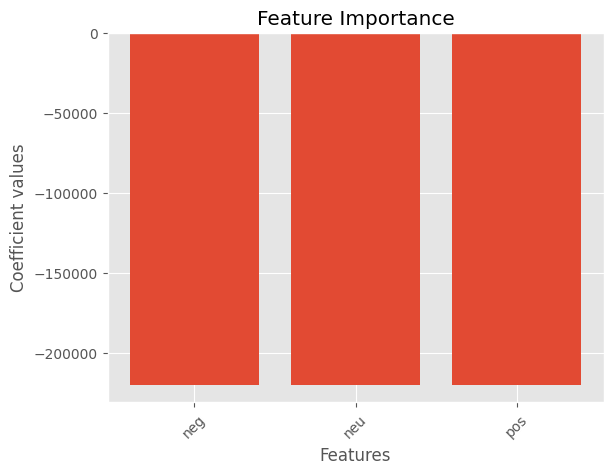

In [36]:
coef = model.coef_  # Assuming 'model' is your trained Linear Regression model
feature_names = ['neg', 'neu', 'pos']  # Replace with your actual feature names
plt.bar(feature_names, coef)
plt.xlabel('Features')
plt.ylabel('Coefficient values')
plt.title('Feature Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()